In [2]:
import statsmodels.api as sm

import os
import pickle
import sys
sys.path.append("/Users/loaloa/homedataAir/phd/ratvr/VirtualReality/analysisVR")
sys.path.append("/Users/loaloa/homedataAir/phd/ratvr/VirtualReality/ephysVR")


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

from analytics_processing import analytics
import analytics_processing.analytics_constants as C
from CustomLogger import CustomLogger as Logger

from dashsrc.plot_components.plot_wrappers.data_selection import group_filter_data

from analytics_processing.modality_loading import session_modality_from_nas
from analytics_processing.sessions_from_nas_parsing import sessionlist_fullfnames_from_args


In [4]:
output_dir = "./outputs/experimental/"
data = {}
nas_dir = C.device_paths()[0]
Logger().init_logger(None, None, logging_level="INFO")



In [5]:
# ephys
paradigm_ids = [1100]
animal_ids = [6]
session_ids = None
# animal_ids = [10]
# session_ids = [7,8]
width = 1400
height = 1400
group_by = None

session_modality_from_nas

<function analytics_processing.modality_loading.session_modality_from_nas(session_fullfname, key, where=None, start=None, stop=None, columns=None)>

In [185]:
# ephys
paradigm_ids = [1100]
animal_ids = [6]
session_ids = None

session_dirs = sessionlist_fullfnames_from_args(paradigm_ids, animal_ids, session_ids)[0]
aggr = []
for sd in session_dirs:
    # if not sd.endswith("2024-11-25_16-25_rYL006_P1100_LinearTrackStop_18min.hdf5"):
    #     continue
    bv = session_modality_from_nas(sd, 'unity_frame', columns=['frame_ephys_timestamp'],stop=1)
    print(os.path.basename(sd))
    aggr.append(bv.iloc[0,0])
    print(aggr[-1])
    print("--")

np.median(pd.Series(aggr).dropna()/1_000_000)
aggr

# plt.hist(aggr, bins=100)
# plt.show()


2024-11-14_15-01_rYL006_P1100_LinearTrackStop_30min.hdf5
nan
--
2024-11-14_16-40_rYL006_P1100_LinearTrackStop_21min.hdf5
1882650.0
--
2024-11-15_15-48_rYL006_P1100_LinearTrackStop_35min.hdf5
1701950.0
--
2024-11-20_17-46_rYL006_P1100_LinearTrackStop_22min.hdf5
1916350.0
--
2024-11-21_17-22_rYL006_P1100_LinearTrackStop_25min.hdf5
1982600.0
--
2024-11-22_16-01_rYL006_P1100_LinearTrackStop_24min.hdf5
nan
--


KeyboardInterrupt: 

In [6]:
sn = '2024-11-14_16-40_rYL006_P1100_LinearTrackStop_21min'
fr = analytics.get_analytics('FiringRate40msHz', session_names=[sn])
fr.index = pd.IntervalIndex.from_arrays(fr.pop("from_ephys_timestamp"), 
                                        fr.pop("to_ephys_timestamp"))
fr[fr>0]


2025-05-30 13:08:33,678|INFO|8784|analytics|get_analytics
	Returning FiringRate40msHz for 1 sessions.


1   2   3   4    5   7   9  10  12  13  ...  68  \
(0, 40000]               NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(40000, 80000]           NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(80000, 120000]          NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(120000, 160000]         NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(160000, 200000]         NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
...                       ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ...  ..   
(1287800000, 1287840000] NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(1287840000, 1287880000] NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(1287880000, 1287920000] NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(1287920000, 1287960000] NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN  ... NaN   
(1287960000, 1288000000] NaN NaN NaN NaN  5.0 NaN NaN NaN NaN NaN  ... NaN   

                           69  70  71   72  73  74  75  76  77  
(0, 40000]                NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(40000, 80000]            NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(80000, 120000]           NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(120000, 160000]          NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(160000, 200000]          NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
...                       ...  ..  ..  ...  ..  ..  ..  ..  ..  
(1287800000, 1287840000]  NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(1287840000, 1287880000]  NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(1287880000, 1287920000]  5.0 NaN NaN  NaN NaN NaN NaN NaN NaN  
(1287920000, 1287960000]  NaN NaN NaN  NaN NaN NaN NaN NaN NaN  
(1287960000, 1288000000]  NaN NaN NaN  5.0 NaN NaN NaN NaN NaN  

[32200 rows x 71 columns]

In [7]:
kinematics = analytics.get_analytics('TrackKinematics', session_names=[sn],
                                     columns=['frame_ephys_timestamp', 'frame_raw', 'frame_yaw', 
                                              'frame_pitch', 'frame_acceleration', 'frame_velocity'])
kinematics.set_index('frame_ephys_timestamp', inplace=True)
kinematics.loc[:, 'frame_velocity'] = np.clip(kinematics.loc[:, 'frame_velocity'], 0, 1e6)
kinematics.loc[:, 'frame_acceleration'] = np.clip(kinematics.loc[:, 'frame_acceleration'], -300, 300)
kinematics

2025-05-30 13:08:35,679|INFO|8784|analytics|get_analytics
	Returning TrackKinematics for 1 sessions.


frame_raw  frame_yaw  frame_pitch  frame_acceleration  \
frame_ephys_timestamp                                                          
1882650                     <NA>       <NA>         <NA>        0.000000e+00   
1902750                      163        -57         -462        0.000000e+00   
1921250                      116        -31         -241        0.000000e+00   
1938000                      157        -48         -235        0.000000e+00   
1954600                      177        -49         -206        0.000000e+00   
...                          ...        ...          ...                 ...   
1286907050                   486        288         -182        0.000000e+00   
1286923700                   351        134          -76        4.547474e-13   
1286940400                   389         96          -50       -9.094947e-13   
1286957050                   424        100          -35        0.000000e+00   
1286983200                   416         99          -23        1.818989e-12   

                       frame_velocity  
frame_ephys_timestamp                  
1882650                           0.0  
1902750                           0.0  
1921250                           0.0  
1938000                           0.0  
1954600                           0.0  
...                               ...  
1286907050                        0.0  
1286923700                        0.0  
1286940400                        0.0  
1286957050                        0.0  
1286983200                        0.0  

[76646 rows x 5 columns]

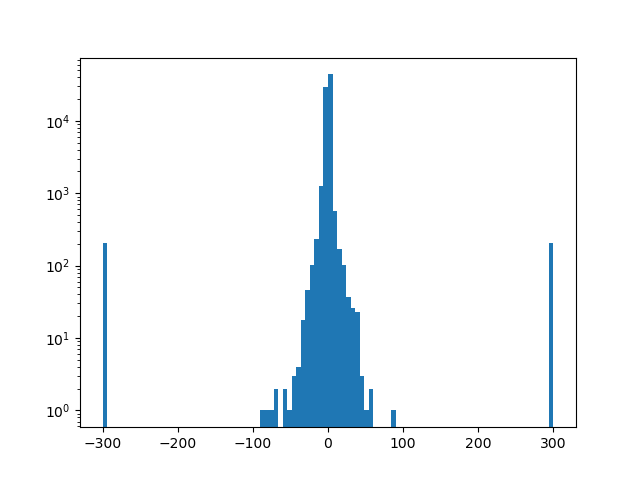

In [8]:
plt.figure()
plt.hist(kinematics['frame_acceleration'], bins=100)
plt.yscale('log')

plt.show()

In [9]:
kinematics['ephys_bin'] = fr.index.get_indexer(kinematics.index)
kinematics = kinematics.groupby('ephys_bin').mean().round(3)
kinematics

frame_raw  frame_yaw  frame_pitch  frame_acceleration  \
ephys_bin                                                          
47             163.0      -57.0       -462.0                 0.0   
48             150.0    -42.667     -227.333                 0.0   
49             187.0      -63.0       -158.0                 0.0   
50             235.0      -81.0       -123.0                 0.0   
51             314.0      -89.5        -91.0                 0.0   
...              ...        ...          ...                 ...   
32170          530.0       62.0       -126.5                -0.0   
32171          356.0    176.333       -135.0                 0.0   
32172          373.0      259.0       -160.0                -0.0   
32173          388.0      110.0      -53.667                -0.0   
32174          416.0       99.0        -23.0                 0.0   

           frame_velocity  
ephys_bin                  
47                    0.0  
48                    0.0  
49                    0.0  
50                    0.0  
51                    0.0  
...                   ...  
32170                 0.0  
32171                 0.0  
32172                 0.0  
32173                 0.0  
32174                 0.0  

[32102 rows x 5 columns]

/var/folders/sw/9r5ts2490s57k9jkvsht712h0000gn/T/ipykernel_8784/2727085199.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 5, figsize=(7, 3), sharey=True)


Unit 61 - frame_raw R^2: 0.033
Unit 61 - frame_pitch R^2: 0.037


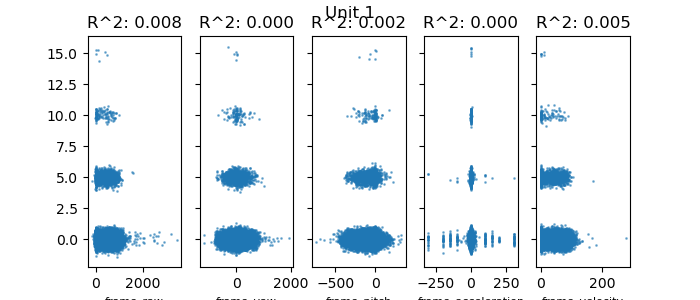

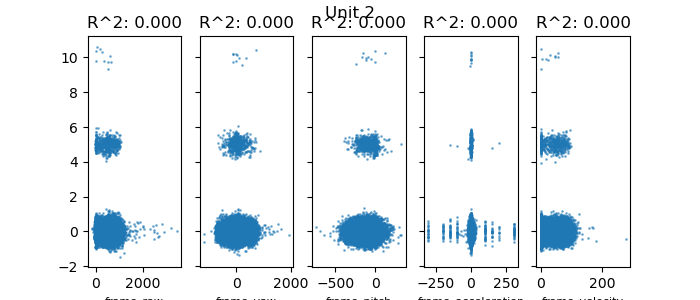

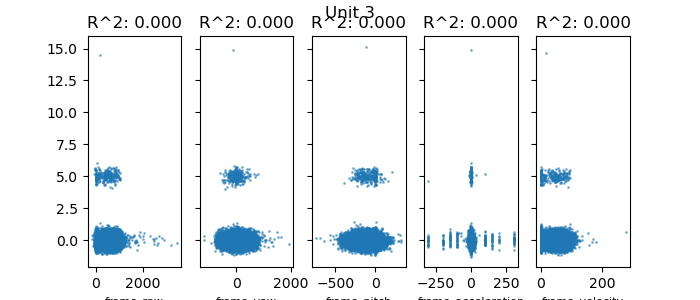

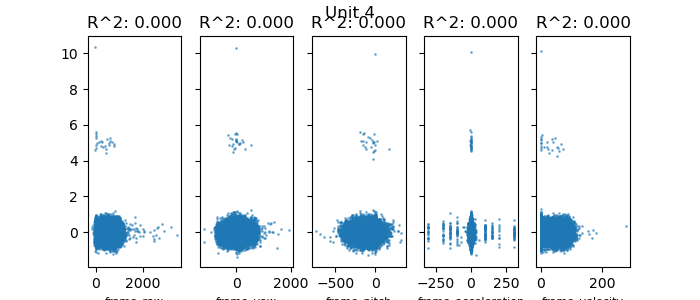

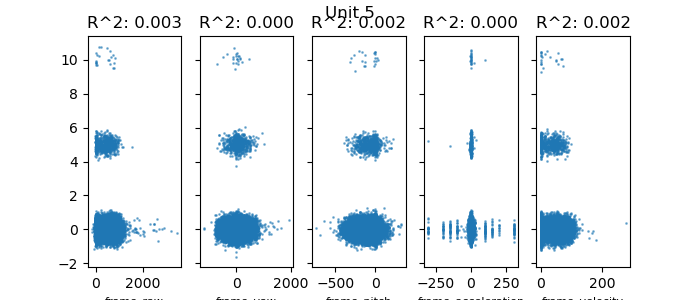

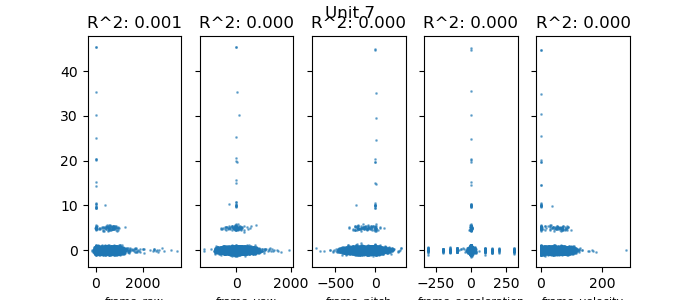

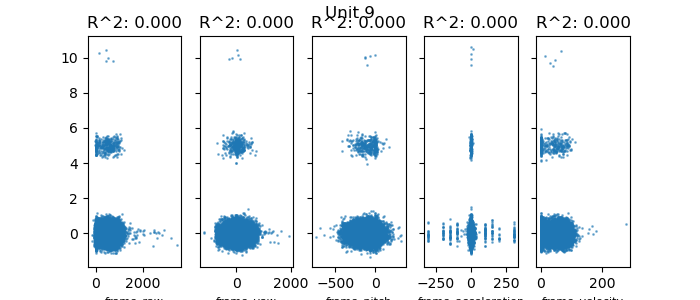

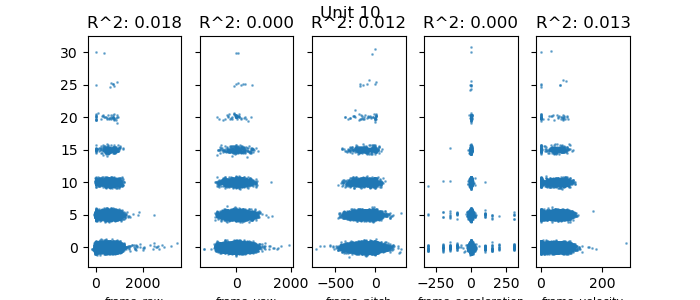

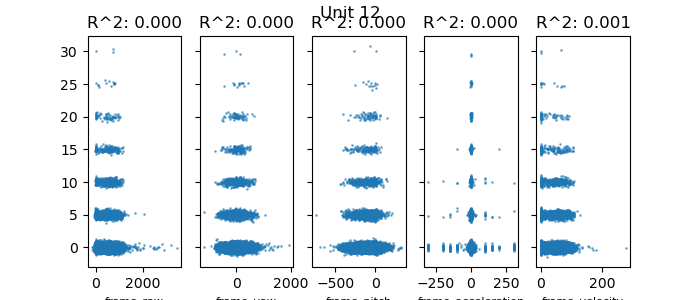

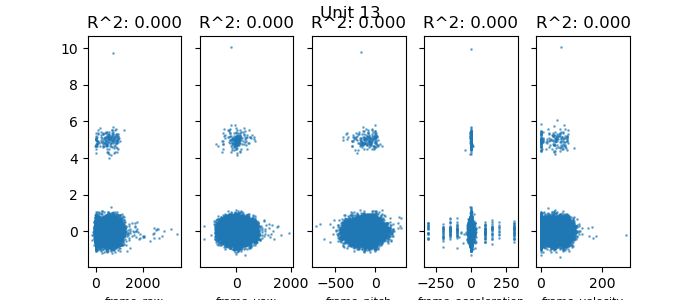

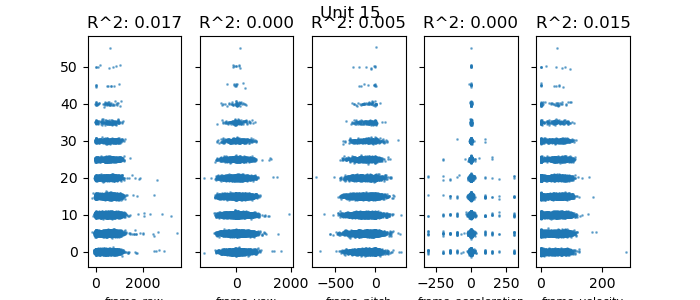

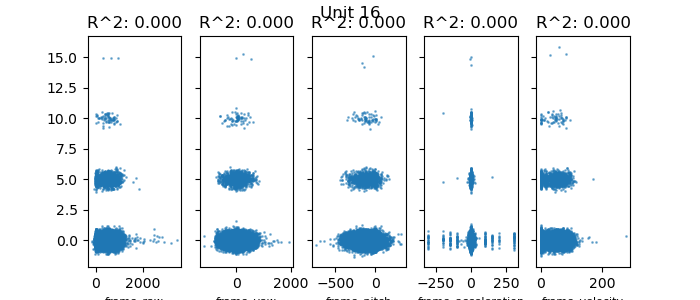

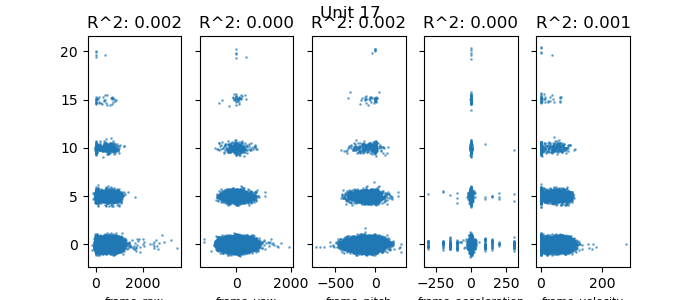

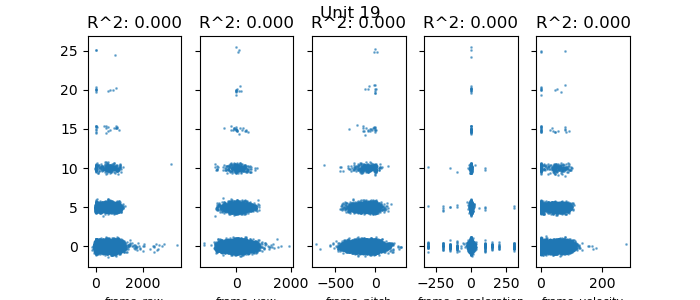

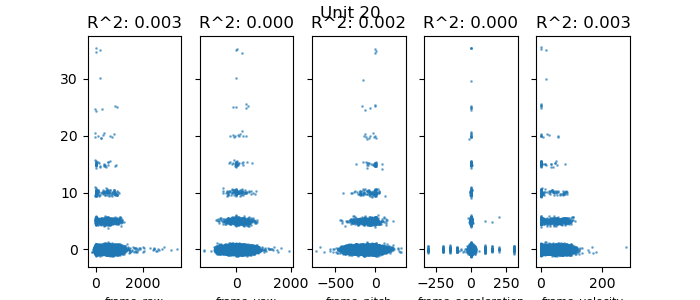

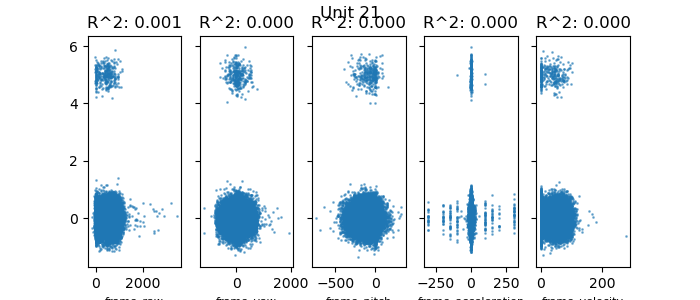

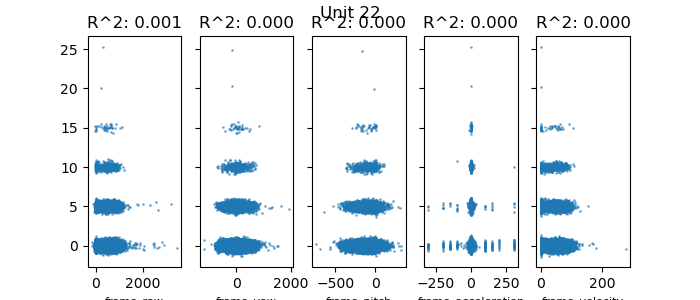

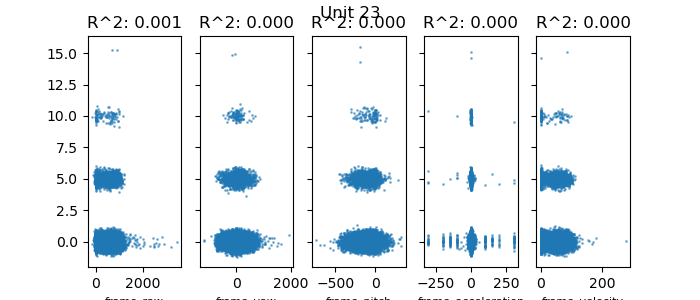

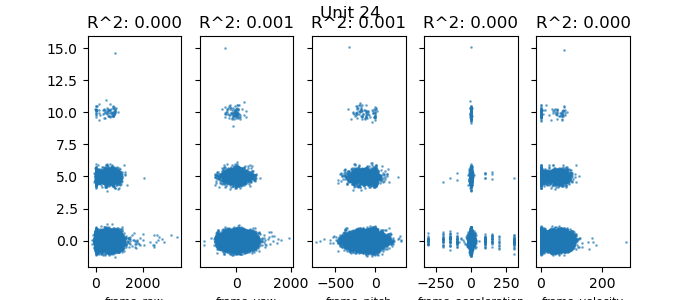

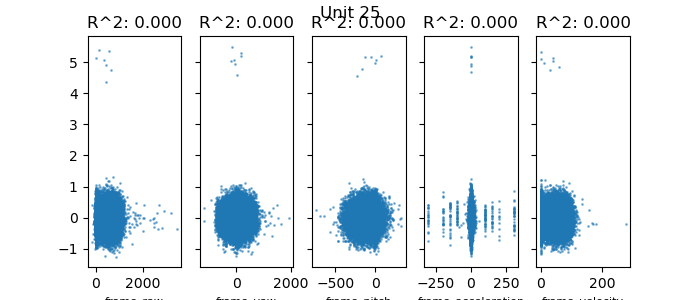

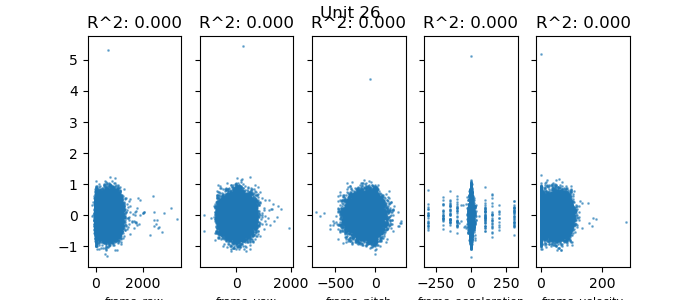

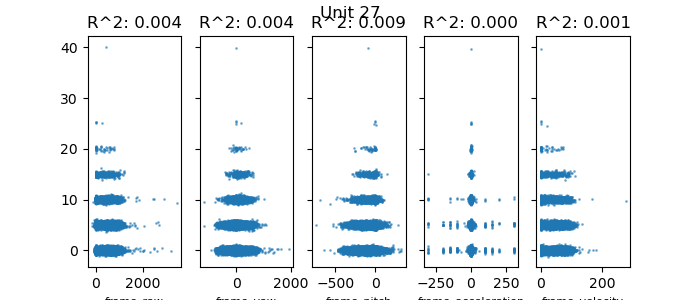

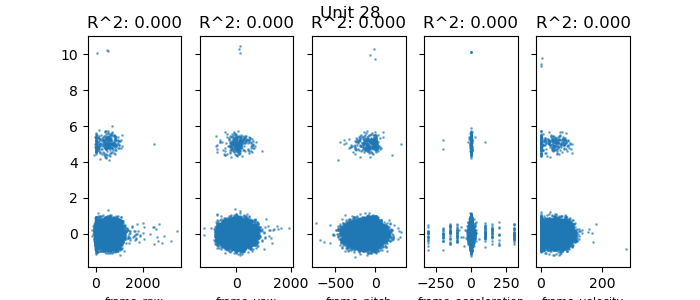

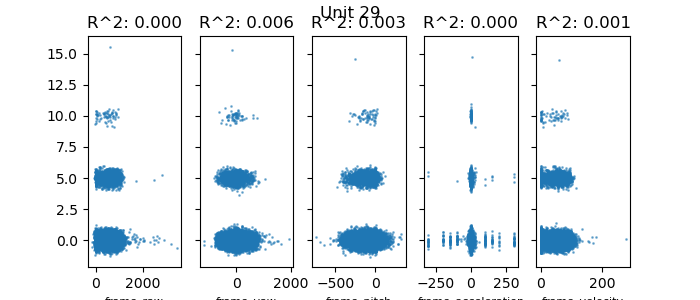

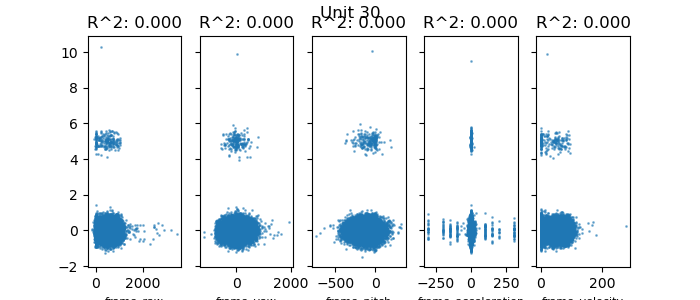

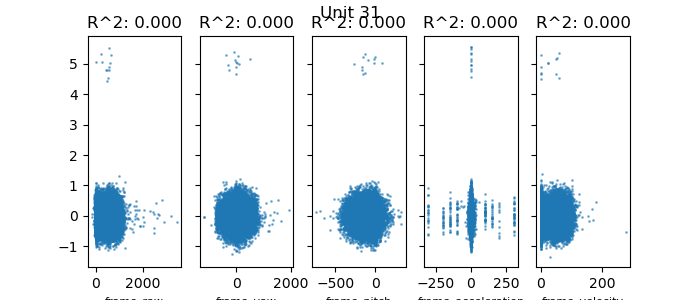

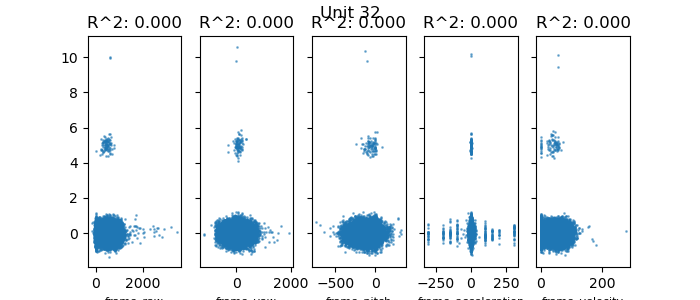

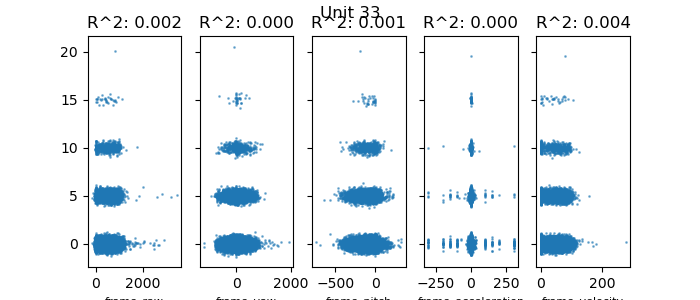

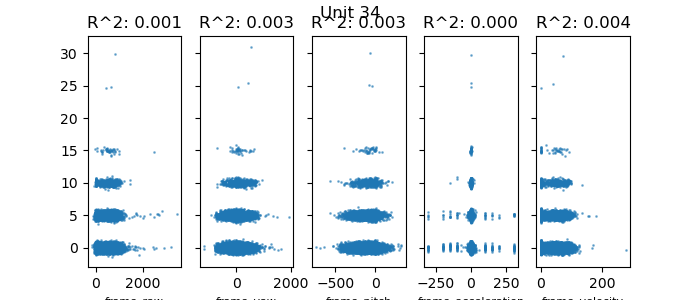

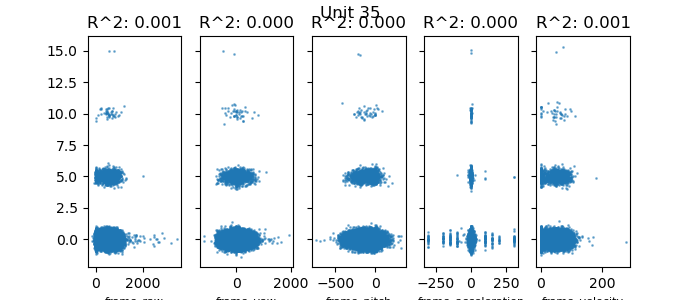

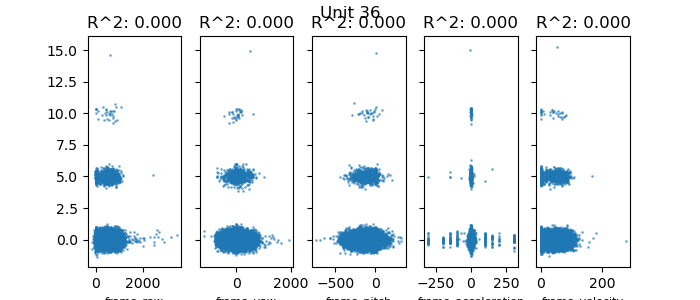

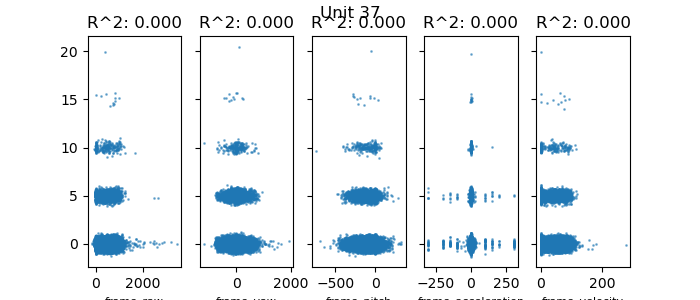

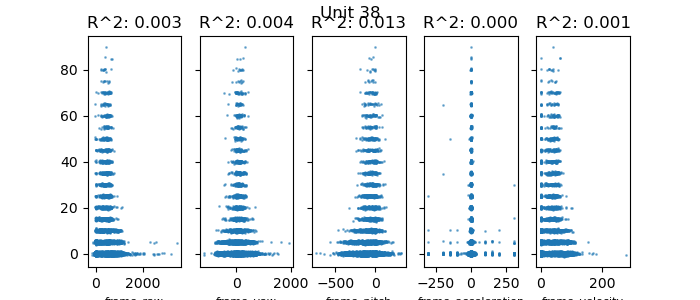

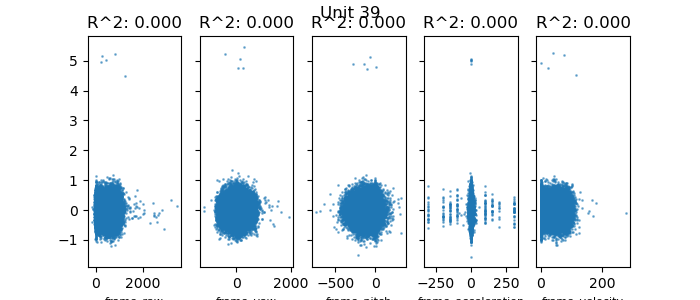

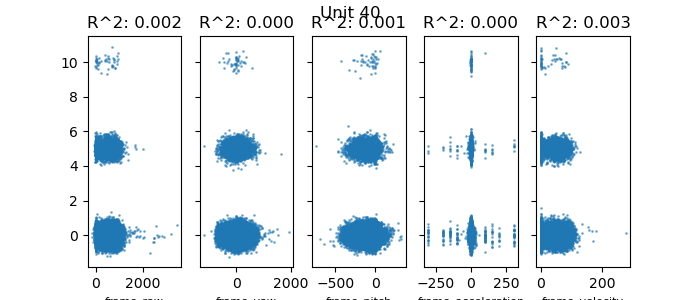

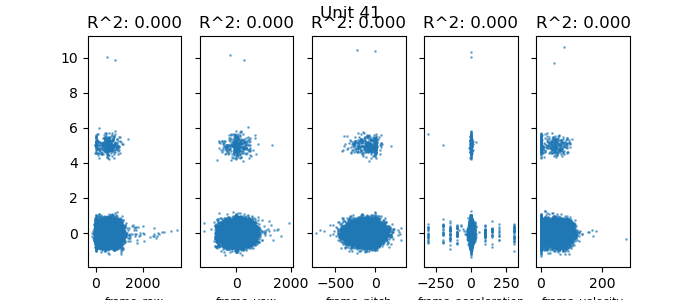

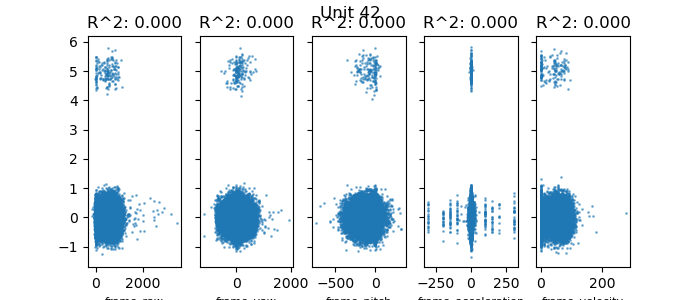

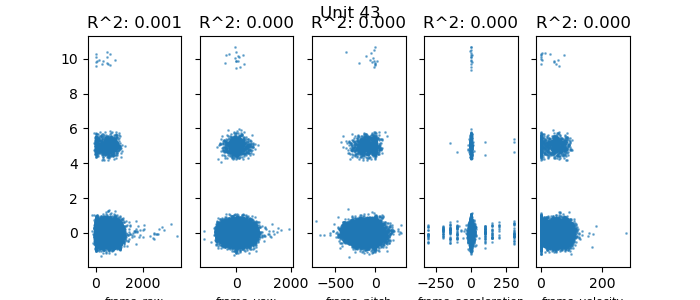

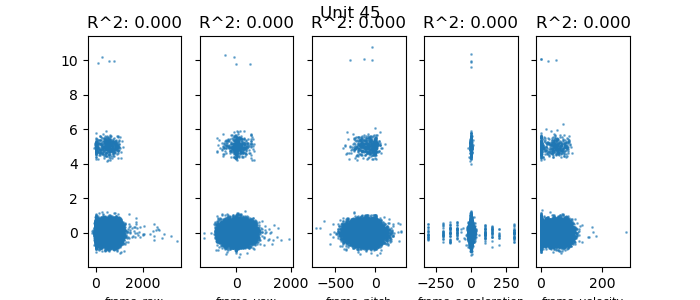

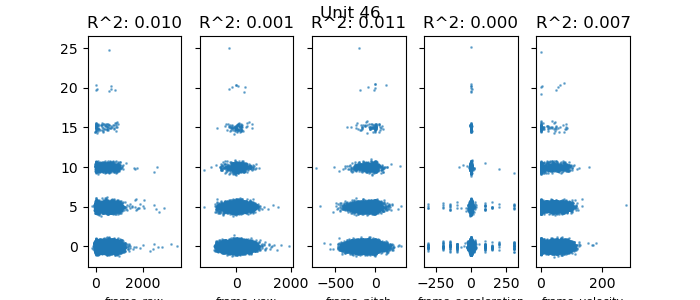

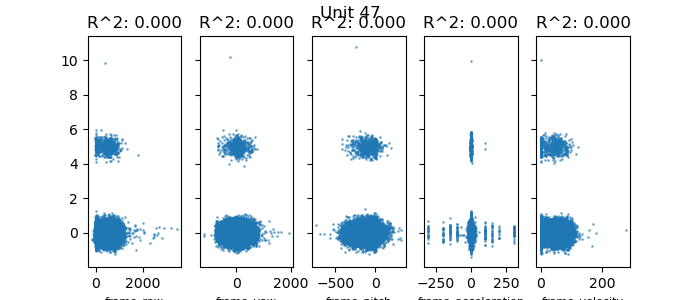

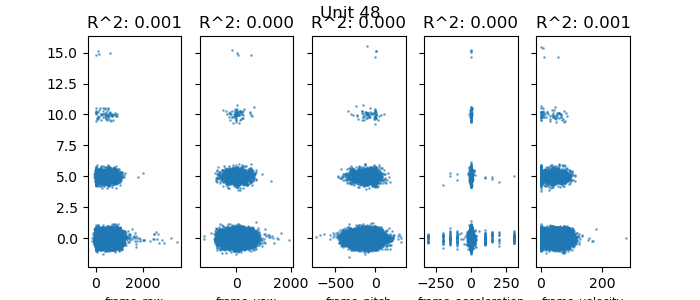

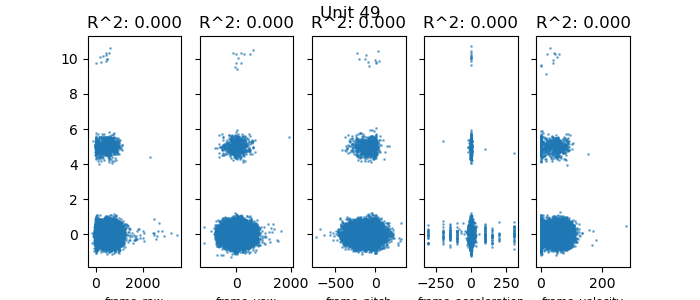

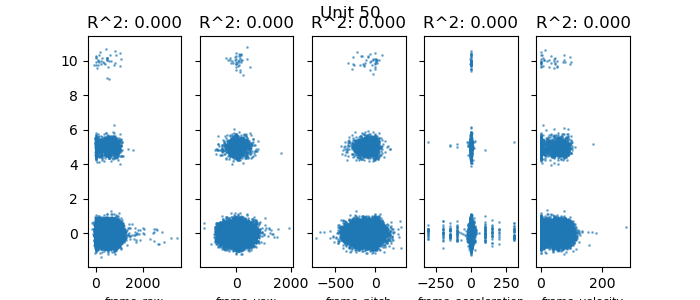

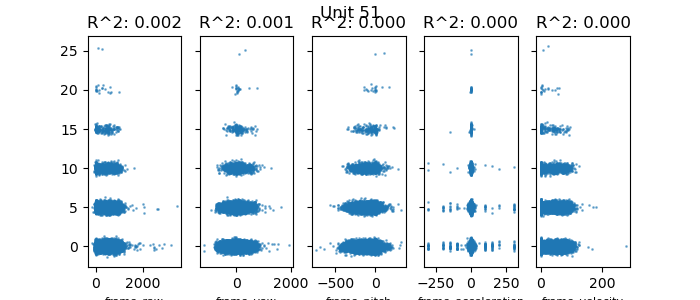

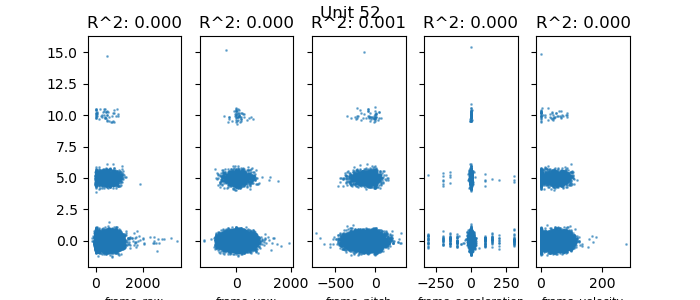

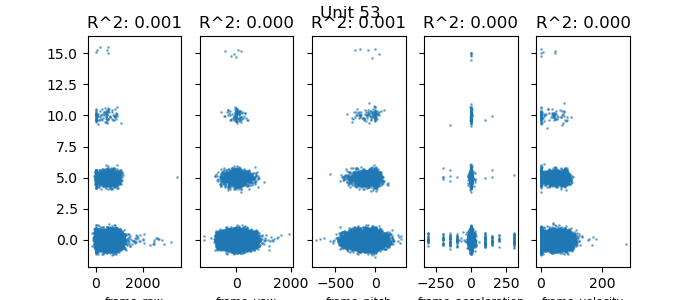

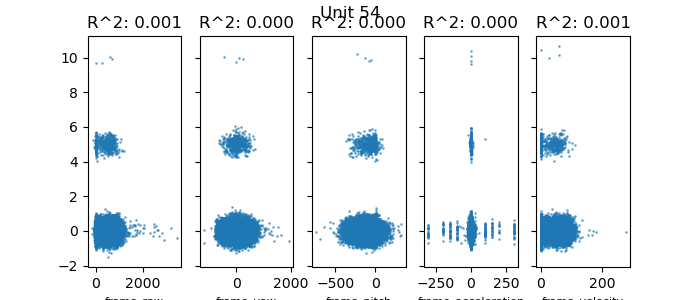

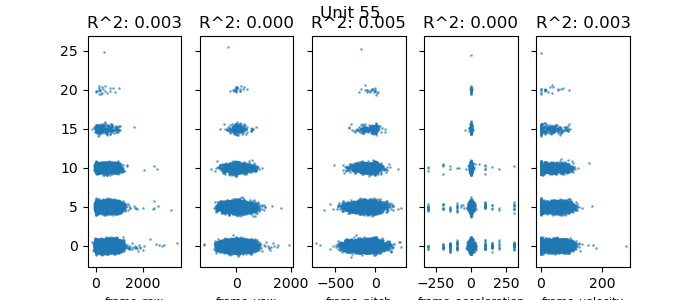

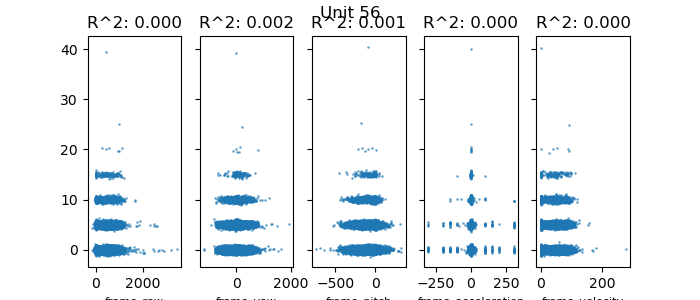

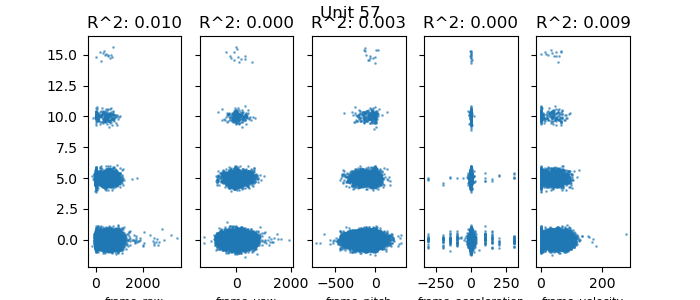

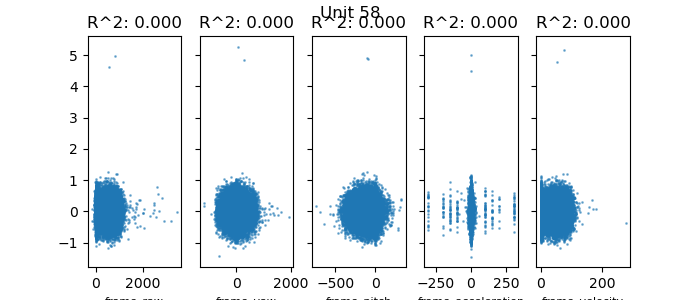

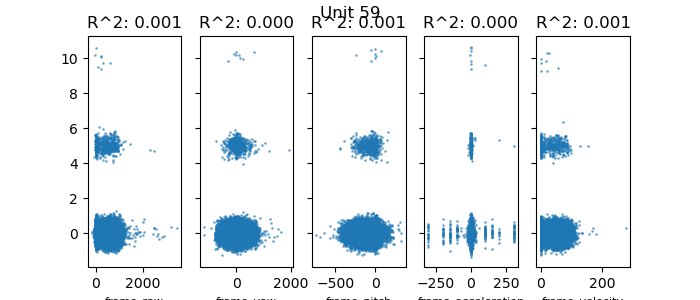

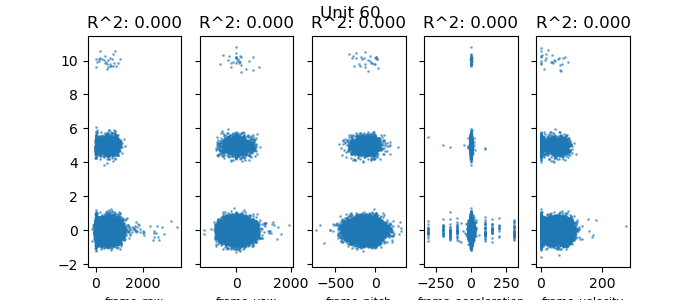

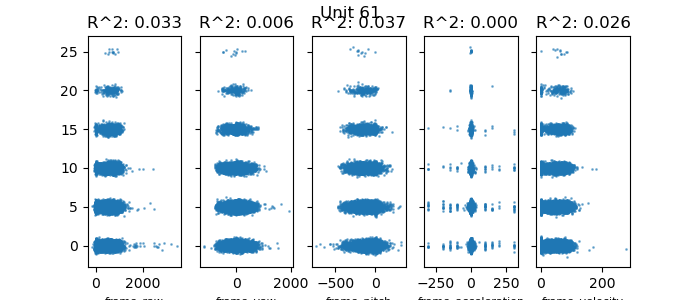

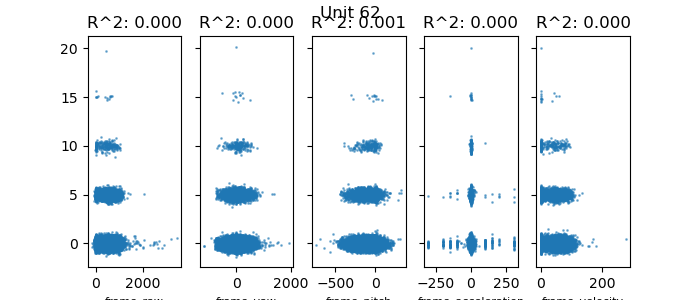

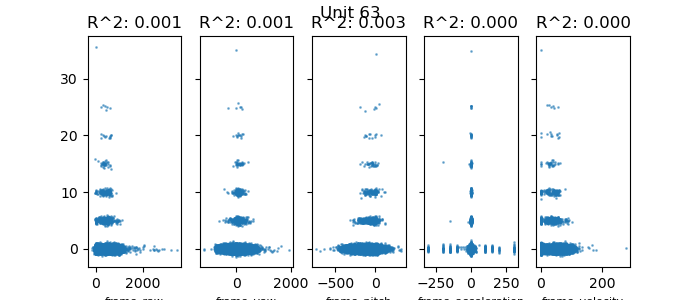

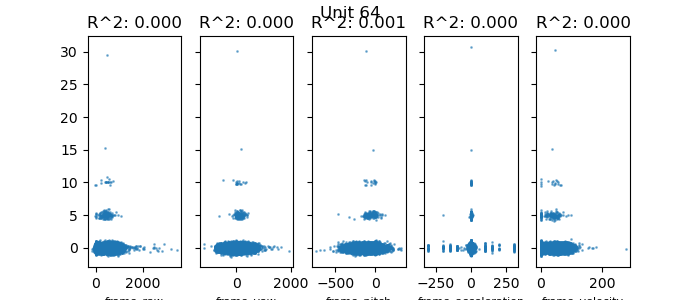

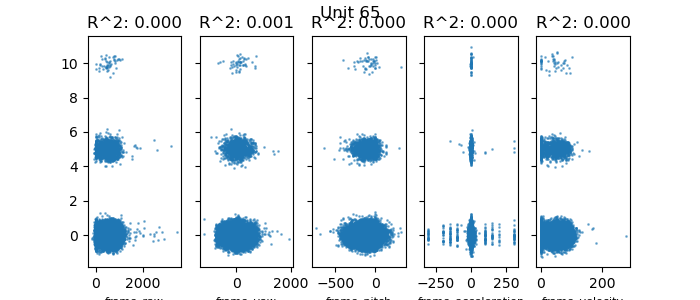

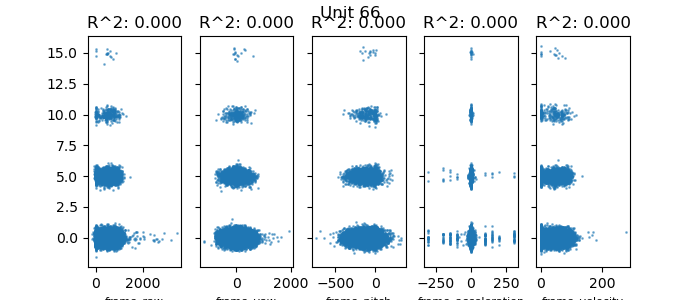

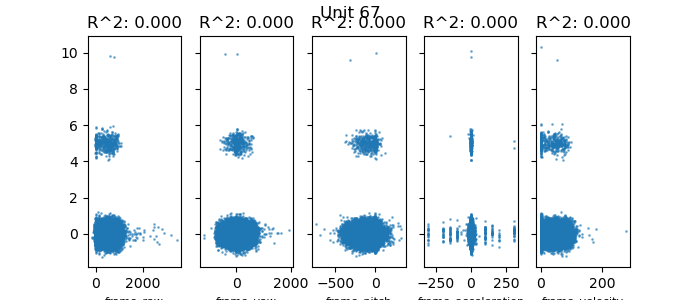

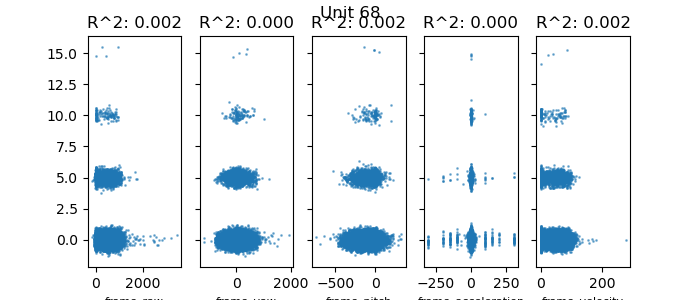

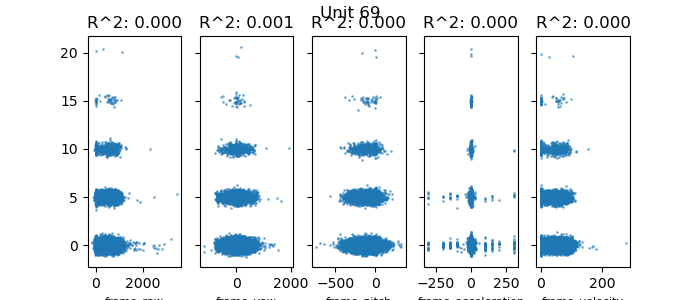

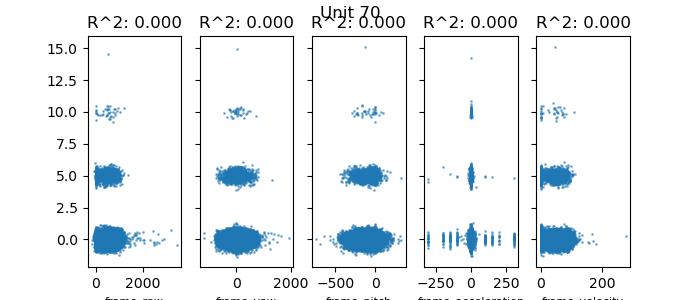

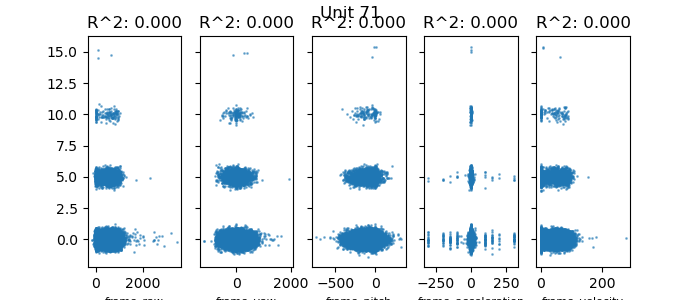

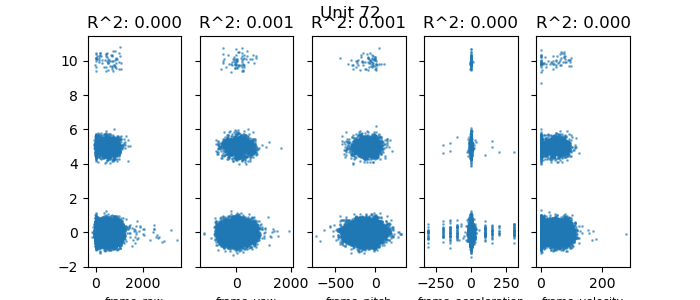

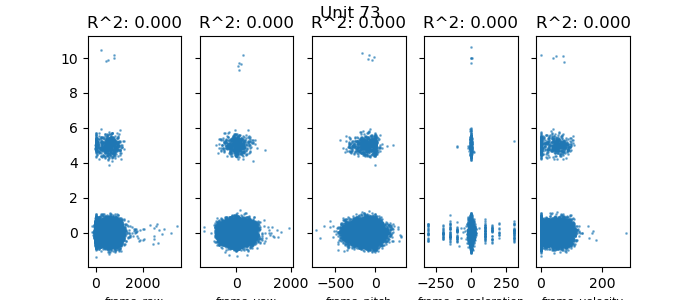

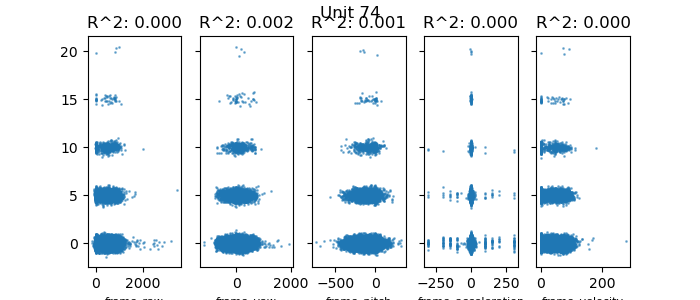

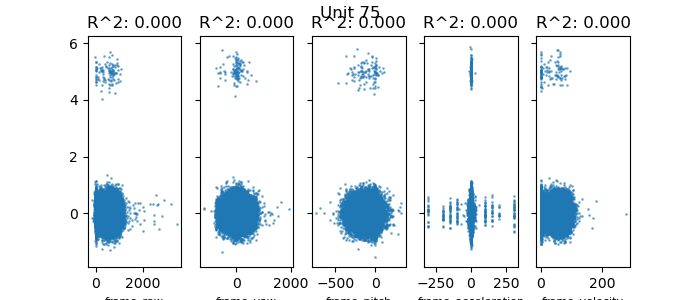

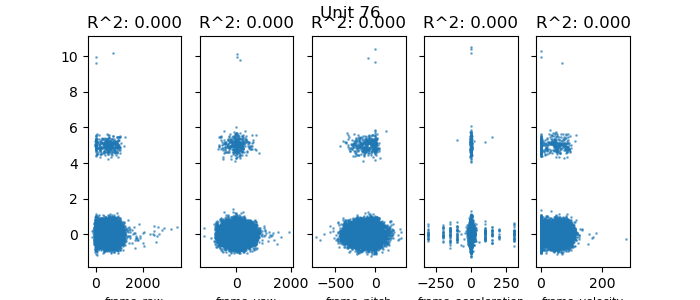

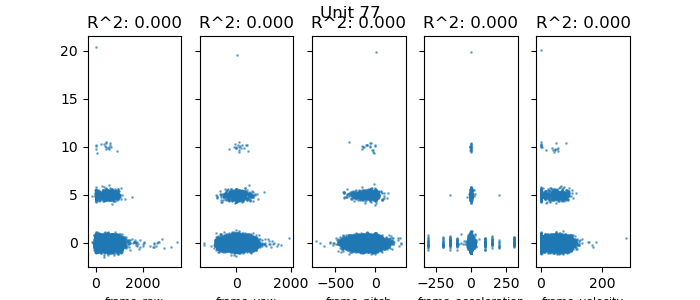

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

for unit in fr.columns:
    unit_fr = fr[unit]
    
    fig, axes = plt.subplots(1, 5, figsize=(7, 3), sharey=True)
    fig.suptitle(f'Unit {unit}', fontsize=12)
    y = unit_fr.iloc[kinematics.index]
    for i, regre in enumerate(('frame_raw', 'frame_yaw', 'frame_pitch', 'frame_acceleration', 'frame_velocity')):
        x = (kinematics[regre])
        
        # fit a regression line
        model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
        y_pred = model.predict(x.values.reshape(-1, 1))
        r_2 = model.score(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
        if r_2 > 0.03:
            print(f"Unit {unit} - {regre} R^2: {r_2:.3f}")
            # print(f"R^2: {r_2:.3f}")
        
        noise = np.random.normal(0, 0.3, size=y.shape)
        axes[i].scatter(x, y+noise, s=1, alpha=0.5)
        axes[i].set_xlabel(f'{regre}', fontsize=8)
        axes[i].set_title(f'R^2: {r_2:.3f}')
    break
    # break

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def animate_body_points(df, start_idx=0, end_idx=240, interval=1000/24):
    """
    Animates pose body points from a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame with MultiIndex and columns like facecam_pose_nose_x/y, etc.
        start_idx (int): Starting frame index (relative to the row index).
        end_idx (int): Ending frame index.
        interval (float): Time between frames in ms, default is 24 FPS.
    """

    # Slice and reset index for simpler access
    df_slice = df.iloc[start_idx:end_idx].reset_index()
    print(df_slice)

    # Extract XY points
    keypoints = ["nose", "neck", "body_1", "body_2", "body_3"]
    xs = {kp: df_slice[f"facecam_pose_{kp}_x"].astype(float).values for kp in keypoints}
    ys = {kp: df_slice[f"facecam_pose_{kp}_y"].astype(float).values for kp in keypoints}

    fig, ax = plt.subplots(figsize=(6, 6))
    scat = ax.scatter([], [], c='r')

    def init():
        ax.set_xlim(0, 640)  # Adjust to your video resolution
        ax.set_ylim(480, 0)  # Invert y-axis to match image coordinates
        scat.set_offsets(np.empty((0, 2)))  # <- fix: use empty 2D array
        return scat,


    def update(frame):
        coords = [[xs[kp][frame], ys[kp][frame]] for kp in keypoints]
        scat.set_offsets(coords)
        return scat,

    ani = FuncAnimation(fig, update, frames=len(df_slice), init_func=init,
                        interval=interval, blit=True)

    plt.close(fig)  # Prevents double rendering in Jupyter
    return ani


In [9]:
pose = analytics.get_analytics('BehaviorPose', session_names=[sn])
pose

# Assuming your DataFrame is called `df`
ani = animate_body_points(pose.reset_index(), start_idx=0, end_idx=5000)
from IPython.display import HTML
HTML(ani.to_jshtml())



2025-05-27 14:27:21,259|INFO|17027|analytics|get_analytics
	Returning BehaviorPose for 1 sessions.


NameError: name 'animate_body_points' is not defined

In [10]:
sn = '2024-11-14_16-40_rYL006_P1100_LinearTrackStop_21min'
spikes = analytics.get_analytics('Spikes', session_names=[sn],
                                 columns=['cluster_id', 'ephys_timestamp']).reset_index(drop=True)

spikes

2025-05-27 14:30:19,744|INFO|17203|analytics|get_analytics
	Returning Spikes for 1 sessions.


cluster_id  ephys_timestamp
0               15            17500
1               61            24150
2               15            29800
3               61            34250
4               61            74400
...            ...              ...
302303          17       1287976950
302304          50       1287979950
302305           5       1287979950
302306          38       1287979950
302307          72       1287979950

[302308 rows x 2 columns]

In [11]:
kinematics = analytics.get_analytics('TrackKinematics', session_names=[sn],
                                     columns=['frame_ephys_timestamp', 'frame_raw', 'frame_yaw', 
                                              'frame_pitch', 'frame_acceleration', 'frame_velocity'])
kinematics.set_index('frame_ephys_timestamp', inplace=True)
kinematics.loc[:, 'frame_velocity'] = np.clip(kinematics.loc[:, 'frame_velocity'], 0, 1e6)
kinematics.loc[:, 'frame_acceleration'] = np.clip(kinematics.loc[:, 'frame_acceleration'], -300, 300)
kinematics.loc[:] = kinematics.loc[:].round(3)

kinematics['frame_end_ephys_timestamp'] = pd.NA
kinematics.iloc[:-1, -1] = kinematics.index[1:].values
kinematics.dropna(inplace=True)
kinematics

kinematics.index = pd.IntervalIndex.from_arrays(kinematics.index.values.astype('int64'), 
                                                kinematics.pop('frame_end_ephys_timestamp').astype('int64'))
print(kinematics.index.is_unique)
kinematics

2025-05-27 14:30:20,120|INFO|17203|analytics|get_analytics
	Returning TrackKinematics for 1 sessions.


True


frame_raw  frame_yaw  frame_pitch  \
(1902750, 1921250]              163        -57         -462   
(1921250, 1938000]              116        -31         -241   
(1938000, 1954600]              157        -48         -235   
(1954600, 1986950]              177        -49         -206   
(1986950, 2003600]              187        -63         -158   
...                             ...        ...          ...   
(1286890400, 1286907050]        260        230         -138   
(1286907050, 1286923700]        486        288         -182   
(1286923700, 1286940400]        351        134          -76   
(1286940400, 1286957050]        389         96          -50   
(1286957050, 1286983200]        424        100          -35   

                          frame_acceleration  frame_velocity  
(1902750, 1921250]                       0.0             0.0  
(1921250, 1938000]                       0.0             0.0  
(1938000, 1954600]                       0.0             0.0  
(1954600, 1986950]                       0.0             0.0  
(1986950, 2003600]                       0.0             0.0  
...                                      ...             ...  
(1286890400, 1286907050]                -0.0             0.0  
(1286907050, 1286923700]                 0.0             0.0  
(1286923700, 1286940400]                 0.0             0.0  
(1286940400, 1286957050]                -0.0             0.0  
(1286957050, 1286983200]                 0.0             0.0  

[76644 rows x 5 columns]

In [12]:

asigmn = kinematics.index.get_indexer(spikes['ephys_timestamp'])
# no_assigmn_mask = asigmn == -1
spikes['assigned_frame'] = asigmn
spikes = spikes[spikes['assigned_frame'] != -1]
spikes

cluster_id  ephys_timestamp  assigned_frame
313             74          1908650               0
314             33          1925450               1
315             10          1930750               1
316             15          1935450               1
317             51          1939700               2
...            ...              ...             ...
302079          69       1286970600           76643
302080          12       1286970650           76643
302081          37       1286973700           76643
302082          61       1286975150           76643
302083          61       1286980850           76643

[301771 rows x 3 columns]

In [13]:
kinematics

frame_raw  frame_yaw  frame_pitch  \
(1902750, 1921250]              163        -57         -462   
(1921250, 1938000]              116        -31         -241   
(1938000, 1954600]              157        -48         -235   
(1954600, 1986950]              177        -49         -206   
(1986950, 2003600]              187        -63         -158   
...                             ...        ...          ...   
(1286890400, 1286907050]        260        230         -138   
(1286907050, 1286923700]        486        288         -182   
(1286923700, 1286940400]        351        134          -76   
(1286940400, 1286957050]        389         96          -50   
(1286957050, 1286983200]        424        100          -35   

                          frame_acceleration  frame_velocity  
(1902750, 1921250]                       0.0             0.0  
(1921250, 1938000]                       0.0             0.0  
(1938000, 1954600]                       0.0             0.0  
(1954600, 1986950]                       0.0             0.0  
(1986950, 2003600]                       0.0             0.0  
...                                      ...             ...  
(1286890400, 1286907050]                -0.0             0.0  
(1286907050, 1286923700]                 0.0             0.0  
(1286923700, 1286940400]                 0.0             0.0  
(1286940400, 1286957050]                -0.0             0.0  
(1286957050, 1286983200]                 0.0             0.0  

[76644 rows x 5 columns]

In [14]:
# Pick one neuron to start
neuron_id = 15

# Filter to spikes from this neuron
neuron_spikes = spikes[spikes['cluster_id'] == neuron_id]

# Count spikes per assigned_frame
spike_counts = neuron_spikes.groupby('assigned_frame').size()

# Create full vector of spike counts (0 if no spikes)
n_bins = kinematics.shape[0]
y = np.zeros(n_bins)
y[spike_counts.index.values] = spike_counts.values

# plt.figure()
# plt.hist(y, bins=100)
# plt.show()

In [16]:
# Extract velocity column as a NumPy array
velocity = kinematics['frame_velocity'].to_numpy()

# Design matrix with intercept and velocity
X = np.column_stack([np.ones(n_bins), velocity])
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [18]:
# import statsmodels.api as sm

# Fit Poisson GLM
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Coefficients
print(results.params)



[-0.30674325  0.00302545]


In [19]:
null_model = sm.GLM(y, np.ones((n_bins, 1)), family=sm.families.Poisson()).fit()
deviance_explained = 1 - results.deviance / null_model.deviance
print(f"Deviance explained: {deviance_explained:.4f}")


Deviance explained: 0.0069


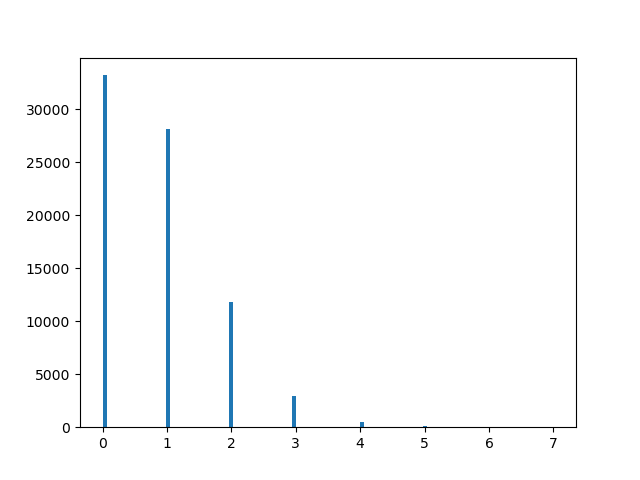

[-0.30674325  0.00302545]
Deviance explained: 0.0069


In [21]:
# Pick one neuron to start
neuron_id = 15

# Filter to spikes from this neuron
neuron_spikes = spikes[spikes['cluster_id'] == neuron_id]

# Count spikes per assigned_frame
spike_counts = neuron_spikes.groupby('assigned_frame').size()

# Create full vector of spike counts (0 if no spikes)
n_bins = kinematics.shape[0]
y = np.zeros(n_bins)
y[spike_counts.index.values] = spike_counts.values

plt.figure()
plt.hist(y, bins=100)
plt.show()

# Extract velocity column as a NumPy array
velocity = kinematics['frame_velocity'].to_numpy()

# Design matrix with intercept and velocity
X = np.column_stack([np.ones(n_bins), velocity])
X
# import statsmodels.api as sm

# Fit Poisson GLM
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Coefficients
print(results.params)


null_model = sm.GLM(y, np.ones((n_bins, 1)), family=sm.families.Poisson()).fit()
deviance_explained = 1 - results.deviance / null_model.deviance
print(f"Deviance explained: {deviance_explained:.4f}")


Processing regressor: frame_raw


100%|██████████| 71/71 [00:35<00:00,  2.02it/s]


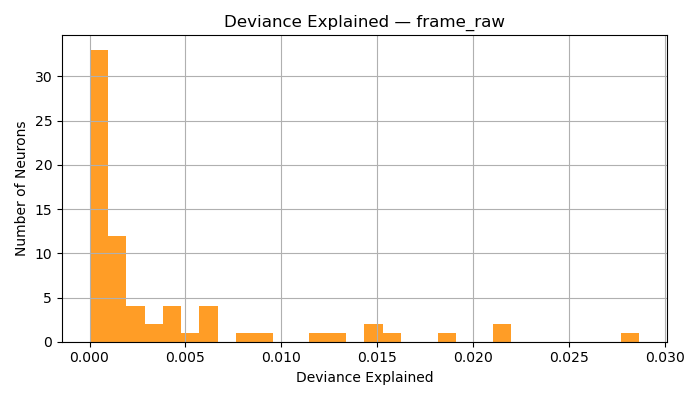

Processing regressor: frame_yaw


100%|██████████| 71/71 [00:30<00:00,  2.33it/s]


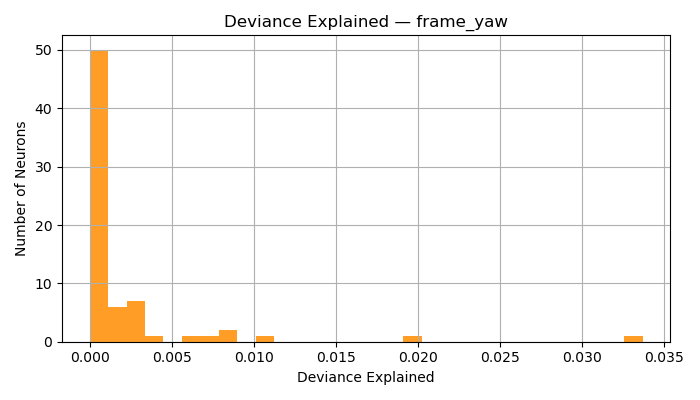

Processing regressor: frame_pitch


100%|██████████| 71/71 [00:24<00:00,  2.89it/s]


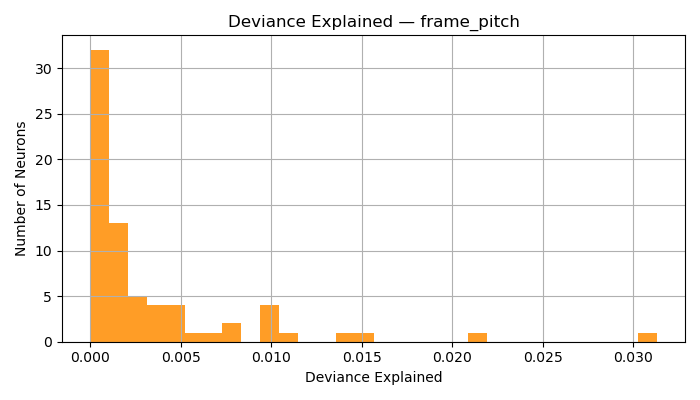

Processing regressor: frame_acceleration


100%|██████████| 71/71 [00:23<00:00,  2.99it/s]


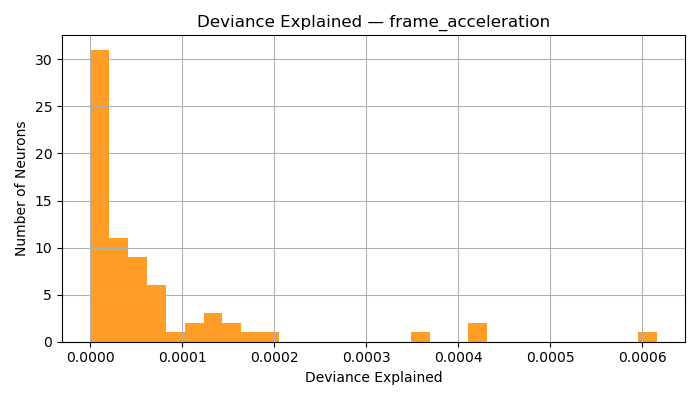

Processing regressor: frame_velocity


100%|██████████| 71/71 [00:35<00:00,  2.01it/s]


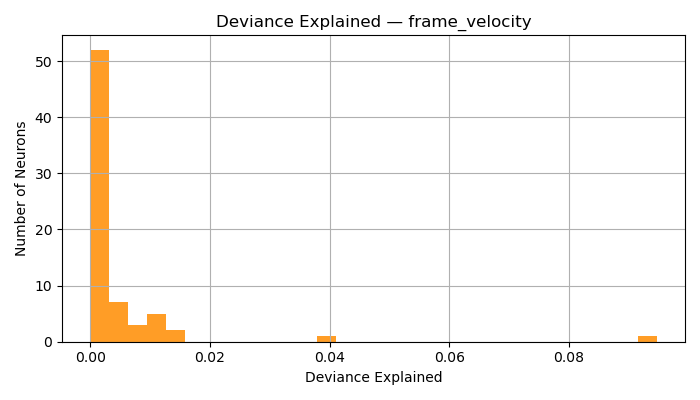

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm

regressors = [
    'frame_raw',
    'frame_yaw',
    'frame_pitch',
    'frame_acceleration',
    'frame_velocity'
]

neuron_ids = spikes['cluster_id'].unique()
n_neurons = len(neuron_ids)
n_bins = kinematics.shape[0]

# Create dictionary to store results
results_by_regressor = {}

for regressor in regressors:
    print(f"Processing regressor: {regressor}")

    X_reg = kinematics[regressor].to_numpy()
    X = np.column_stack([np.ones(n_bins), X_reg])

    betas = np.zeros((n_neurons, X.shape[1]))
    deviances = np.zeros(n_neurons)
    mean_firing_rates = np.zeros(n_neurons)

    for i, neuron_id in enumerate(tqdm(neuron_ids)):
        neuron_spikes = spikes[spikes['cluster_id'] == neuron_id]
        spike_counts = neuron_spikes.groupby('assigned_frame').size()
        y = np.zeros(n_bins)
        y[spike_counts.index.values] = spike_counts.values

        if y.sum() == 0:
            betas[i, :] = np.nan
            deviances[i] = np.nan
            continue

        model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
        null_model = sm.GLM(y, np.ones((n_bins, 1)), family=sm.families.Poisson()).fit()

        betas[i, :] = model.params
        deviances[i] = 1 - model.deviance / null_model.deviance
        mean_firing_rates[i] = y.sum() / (n_bins * 16.66e-3)  # spikes/sec

    # Store results
    results_by_regressor[regressor] = {
        'betas': betas,
        'deviances': deviances,
        'mean_firing_rates': mean_firing_rates,
    }

    # Plot histogram
    plt.figure(figsize=(7, 4))
    plt.hist(deviances[~np.isnan(deviances)], bins=30, color='darkorange', alpha=0.85)
    plt.title(f"Deviance Explained — {regressor}")
    plt.xlabel("Deviance Explained")
    plt.ylabel("Number of Neurons")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


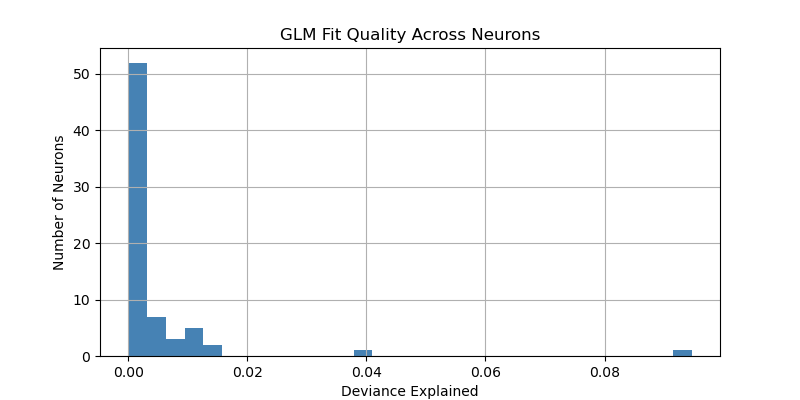

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(deviances[~np.isnan(deviances)], bins=30, color='steelblue')
plt.xlabel("Deviance Explained")
plt.ylabel("Number of Neurons")
plt.title("GLM Fit Quality Across Neurons")
plt.grid(True)
plt.show()
